In [8]:
"""Simple tutorial using code from the TensorFlow example for Regression.

Parag K. Mital, Jan. 2016"""
# pip3 install --upgrade
# https://storage.googleapis.com/tensorflow/mac/tensorflow-0.6.0-py3-none-any.whl

'Simple tutorial using code from the TensorFlow example for Regression.\n\nParag K. Mital, Jan. 2016'

In [9]:
# %%
%matplotlib inline
import tensorflow as tf
import tensorflow.examples.tutorials.mnist.input_data as input_data
import numpy as np
import matplotlib.pyplot as plt


In [10]:
# %%
# get the classic mnist dataset
# one-hot means a sparse vector for every observation where only
# the class label is 1, and every other class is 0.
# more info here:
# https://www.tensorflow.org/versions/0.6.0/tutorials/mnist/download/index.html#dataset-object
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [11]:
# %%
# mnist is now a DataSet with accessors for:
# 'train', 'test', and 'validation'.
# within each, we can access:
# images, labels, and num_examples
print(mnist.train.num_examples,
      mnist.test.num_examples,
      mnist.validation.num_examples)

(55000, 10000, 5000)


In [12]:
# %% the images are stored as:
# n_observations x n_features tensor (n-dim array)
# the labels are stored as n_observations x n_labels,
# where each observation is a one-hot vector.
print(mnist.train.images.shape, mnist.train.labels.shape)

((55000, 784), (55000, 10))


In [13]:
# %% the range of the values of the images is from 0-1
print(np.min(mnist.train.images), np.max(mnist.train.images))

(0.0, 1.0)


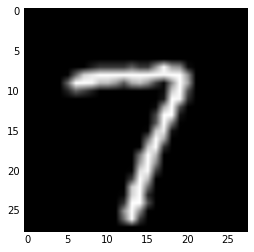

In [14]:
# %% we can visualize any one of the images by reshaping it to a 28x28 image
plt.imshow(np.reshape(mnist.train.images[100, :], (28, 28)), cmap='gray')

In [15]:
# %% We can create a container for an input image using tensorflow's graph:
# We allow the first dimension to be None, since this will eventually
# represent our mini-batches, or how many images we feed into a network
# at a time during training/validation/testing.
# The second dimension is the number of features that the image has.
n_input = 784
n_output = 10
net_input = tf.placeholder(tf.float32, [None, n_input])

In [16]:
# %% We can write a simple regression (y = W*x + b) as:
W = tf.Variable(tf.zeros([n_input, n_output]))
b = tf.Variable(tf.zeros([n_output]))
net_output = tf.nn.softmax(tf.matmul(net_input, W) + b)

In [17]:
# %% We'll create a placeholder for the true output of the network
y_true = tf.placeholder(tf.float32, [None, 10])

In [18]:
# %% And then write our loss function:
cross_entropy = -tf.reduce_sum(y_true * tf.log(net_output))

In [19]:
# %% This would equate each label in our one-hot vector between the
# prediction and actual using the argmax as the predicted label
correct_prediction = tf.equal(
    tf.argmax(net_output, 1), tf.argmax(y_true, 1))

In [20]:
# %% And now we can look at the mean of our network's correct guesses
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

In [21]:
# %% We can tell the tensorflow graph to train w/ gradient descent using
# our loss function and an input learning rate
optimizer = tf.train.GradientDescentOptimizer(
    0.01).minimize(cross_entropy)

In [22]:
# %% We now create a new session to actually perform the initialization the
# variables:
sess = tf.Session()
sess.run(tf.initialize_all_variables())

In [23]:
# %% Now actually do some training:
batch_size = 100
n_epochs = 10
for epoch_i in range(n_epochs):
    for batch_i in range(mnist.train.num_examples // batch_size):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        sess.run(optimizer, feed_dict={
            net_input: batch_xs,
            y_true: batch_ys
        })
    print(sess.run(accuracy,
                   feed_dict={
                       net_input: mnist.validation.images,
                       y_true: mnist.validation.labels
                   }))

0.8994
0.9236
0.9242
0.9152
0.9216
0.915
0.918
0.9256
0.926
0.9228


In [24]:
# %% Print final test accuracy:
print(sess.run(accuracy,
               feed_dict={
                   net_input: mnist.test.images,
                   y_true: mnist.test.labels
               }))

0.923


In [25]:
# %%
"""
# We could do the same thing w/ Keras like so:
from keras.models import Sequential
model = Sequential()

from keras.layers.core import Dense, Activation
model.add(Dense(output_dim=10, input_dim=784, init='zero'))
model.add(Activation("softmax"))

from keras.optimizers import SGD
model.compile(loss='categorical_crossentropy', 
    optimizer=SGD(lr=learning_rate))

model.fit(mnist.train.images, mnist.train.labels, nb_epoch=n_epochs,
          batch_size=batch_size, show_accuracy=True)

objective_score = model.evaluate(mnist.test.images, mnist.test.labels,
                                 batch_size=100, show_accuracy=True)
"""

'\n# We could do the same thing w/ Keras like so:\nfrom keras.models import Sequential\nmodel = Sequential()\n\nfrom keras.layers.core import Dense, Activation\nmodel.add(Dense(output_dim=10, input_dim=784, init=\'zero\'))\nmodel.add(Activation("softmax"))\n\nfrom keras.optimizers import SGD\nmodel.compile(loss=\'categorical_crossentropy\', \n    optimizer=SGD(lr=learning_rate))\n\nmodel.fit(mnist.train.images, mnist.train.labels, nb_epoch=n_epochs,\n          batch_size=batch_size, show_accuracy=True)\n\nobjective_score = model.evaluate(mnist.test.images, mnist.test.labels,\n                                 batch_size=100, show_accuracy=True)\n'